<a href="https://colab.research.google.com/github/lucasrabd/GlobalSolutionFiap/blob/main/GLOBAL_SOLUTION_FINAL_WINK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
O objetivo deste estudo é desenvolver um modelo preditivo usando técnicas de Machine Learning para prever condições ambientais marítimas. Isso ajudará a antecipar eventos prejudiciais para a vida marinha, promovendo intervenções proativas.

# Exploração de Dados
Na exploração de dados, utilizamos um dataset que contém várias colunas representando diferentes características ambientais, como níveis de poluição, temperatura da água, salinidade, e outras variáveis relevantes.

## Motivo da Escolha das Tabelas
As tabelas escolhidas para estudo foram baseadas em sua relevância para prever condições ambientais e possíveis impactos na vida marinha. As colunas principais incluem:

1. **Níveis de Poluição (Pollution Levels):**
   - **Causa:** Aumentos nos níveis de poluentes como nitrogênio e fósforo podem levar à eutrofização, causando morte de peixes e outros organismos aquáticos.
   - **Impacto:** Poluição pode diminuir a qualidade da água, afetando a saúde geral do ecossistema marinho.

2. **Temperatura da Água (Water Temperature):**
   - **Causa:** Mudanças na temperatura da água podem ser causadas por variáveis climáticas e atividades humanas.
   - **Impacto:** Temperaturas anormalmente altas ou baixas podem estressar organismos marinhos, afetando a reprodução e a sobrevivência.

3. **Salinidade (Salinity):**
   - **Causa:** Variações na salinidade podem ser causadas por chuvas, entrada de água doce, e evaporação.
   - **Impacto:** A salinidade afeta a osmorregulação (capacidade que alguns animais têm de manter de forma ativa o equilíbrio da quantidade de água e dos sais minerais no organismo) dos organismos marinhos, influenciando sua saúde e distribuição.

4. **Níveis de Oxigênio Dissolvido (Dissolved Oxygen Levels):**
   - **Causa:** A atividade de plantas aquáticas e a decomposição de matéria orgânica influenciam os níveis de oxigênio dissolvido.
   - **Impacto:** Níveis baixos de oxigênio podem levar à hipóxia (Redução do nível de oxigênio a níveis abaixo do ótimo) , resultando em zonas mortas onde a vida marinha não pode sobreviver.

5. **pH da Água:**
   - **Causa:** A acidificação dos oceanos, devido à absorção de CO2 atmosférico, altera o pH da água.
   - **Impacto:** Um pH alterado pode prejudicar organismos marinhos, especialmente aqueles com conchas de carbonato de cálcio.


# Previsão de Condições Ambientais Marítimas
Este notebook desenvolve um modelo preditivo usando técnicas de Machine Learning para prever condições ambientais marítimas. O objetivo é ajudar a antecipar eventos prejudiciais para a vida marinha. O desenvolvimento envolve as etapas de exploração de dados, levantamento de hipóteses, criação e treinamento de modelo com validações e conclusão.
    


## 2. Exploração de Dados
Nesta seção, exploramos o dataset para entender suas características e distribuições.
    

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import numpy as np

# Carregar dados
data_path = '/content/waterPollution.csv'
data = pd.read_csv(data_path)

# Informações gerais sobre os dados
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      19896 non-null  object 
 10

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84



### Comentários sobre os Dados
O dataset contém diversas colunas que representam diferentes características ambientais. Algumas colunas possuem valores ausentes que precisam ser tratados antes da modelagem.
    


## 3. Conversão de Colunas Não Numéricas
Convertendo colunas não numéricas para categóricas para facilitar a análise.
    

In [2]:

# Converter colunas não numéricas para categóricas
non_numeric_columns = data.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    data[column] = data[column].astype('category').cat.codes

# Verificar novamente as colunas após conversão
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  int8   
 1   observedPropertyDeterminandCode              20000 non-null  int16  
 2   procedureAnalysedFraction                    20000 non-null  int8   
 3   procedureAnalysedMedia                       20000 non-null  int8   
 4   resultUom                                    20000 non-null  int8   
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  int16  
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  int16  
 9   Country                                      20000 non-null  int8   
 10


### Comentários sobre a Conversão
As colunas não numéricas foram convertidas para códigos categóricos. Agora, podemos prosseguir com a análise de correlação.
    


## 4. Visualização de Correlação
Analisando a correlação entre as variáveis para identificar relações importantes.
    

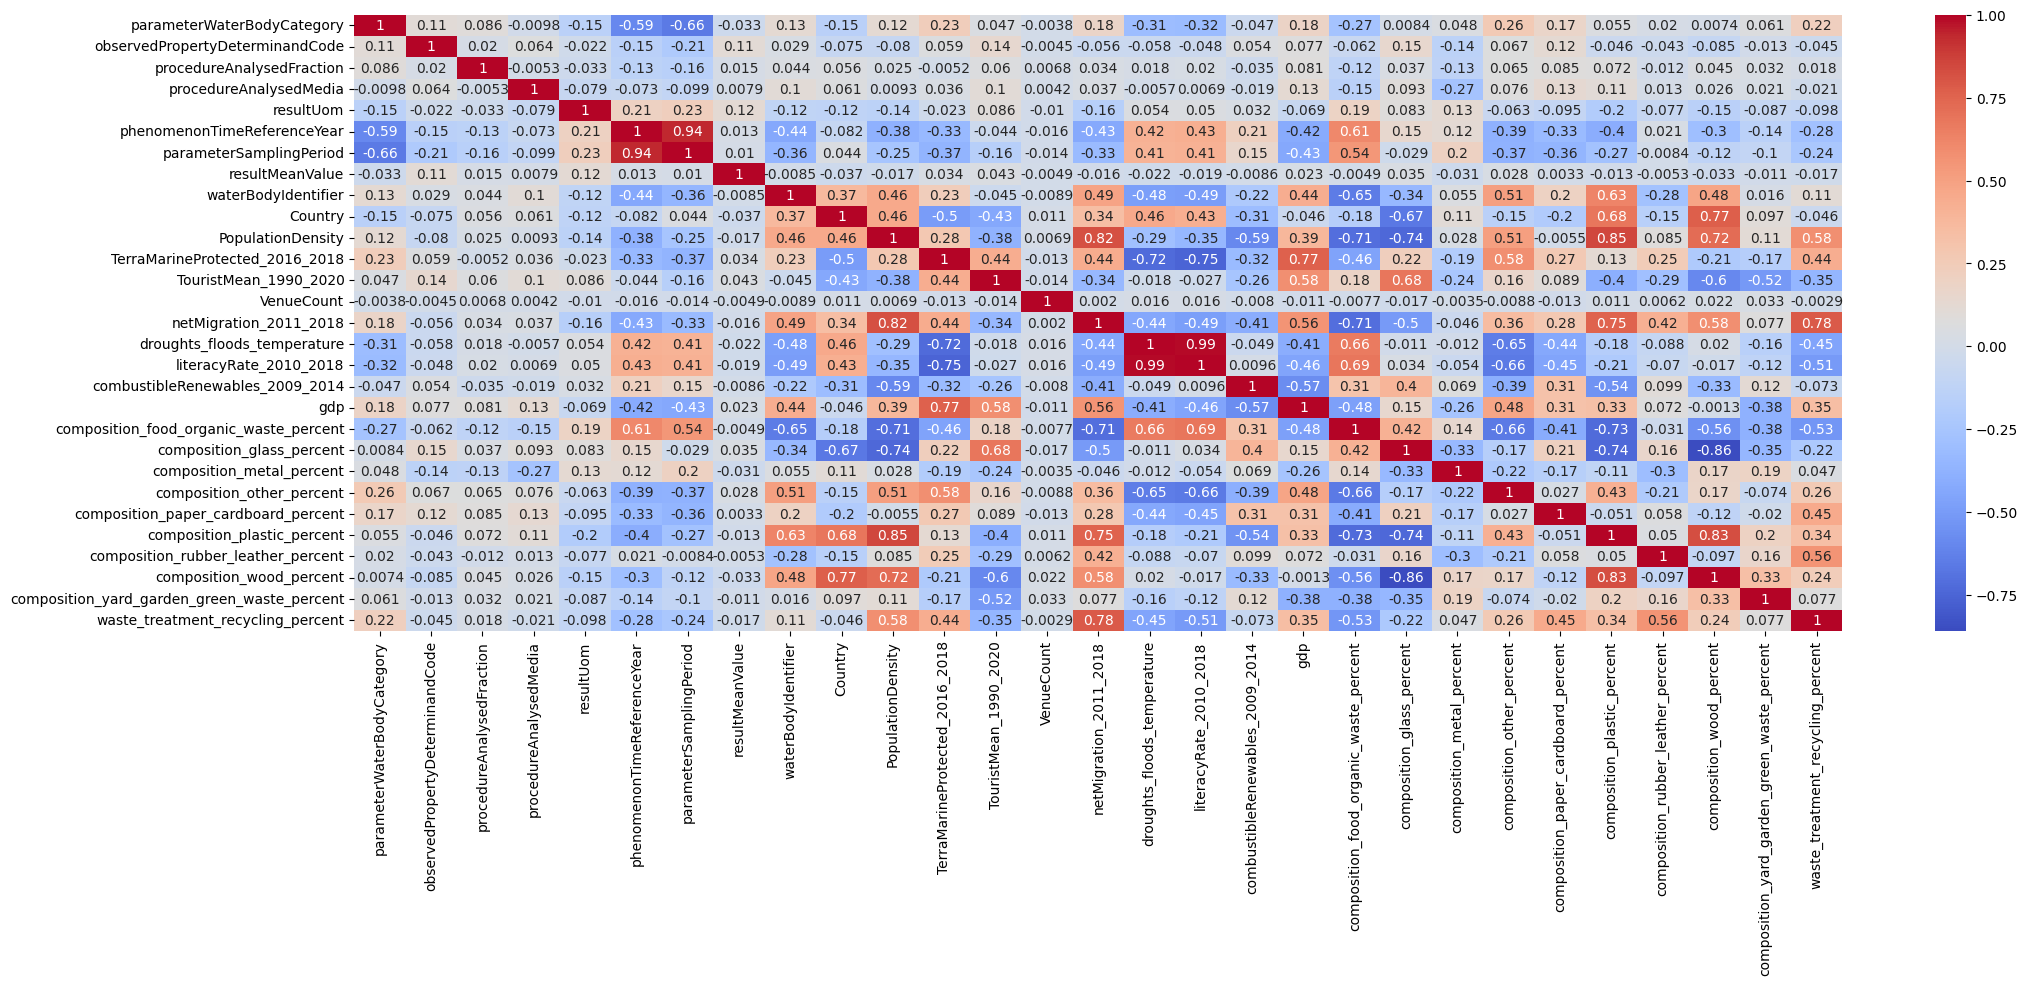

In [4]:

# Visualização de correlação
plt.figure(figsize=(24, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()



### Comentários sobre a Correlação
A visualização de correlação ajuda a identificar quais variáveis estão mais relacionadas umas com as outras. Isso pode ser útil na seleção de características para o modelo.
    


# 5. Seleção de Variáveis e Tratamento de Valores Ausentes
Selecionando as variáveis importantes e tratando valores ausentes no dataset.
    

### Processamento e Modelagem
- **Imputação de Valores Ausentes:** Foi usado o `SimpleImputer` para tratar valores ausentes, garantindo que todos os dados fossem completos antes da modelagem.
- **Normalização dos Dados:** Utilizou-se `StandardScaler` para normalizar os dados, garantindo que todas as variáveis tivessem uma média de 0 e um desvio padrão de 1.
- **Divisão do Conjunto de Dados:** O conjunto de dados foi dividido em conjuntos de treinamento e teste usando `train_test_split`.
- **Modelo de Regressão:** Foi escolhido o `RandomForestRegressor` devido à sua capacidade de lidar com grandes volumes de dados e capturar relações complexas entre as variáveis.
- **Validação Cruzada:** Utilizou-se `cross_val_score` para validar o modelo, assegurando sua robustez e generalização.

In [5]:

# Seleção de variáveis (ajuste conforme necessário)
X = data[['droughts_floods_temperature', 'composition_food_organic_waste_percent', 'composition_glass_percent']]
y = data['waste_treatment_recycling_percent']  # Exemplo de variável alvo (ajuste conforme necessário)

# Tratamento de valores ausentes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()



### Comentários sobre a Seleção e Tratamento
Selecionamos três variáveis importantes para prever a taxa de reciclagem de resíduos. Valores ausentes foram tratados usando a estratégia de média.
    


# 6. Criação e Treinamento do Modelo
Criando e treinando um modelo de RandomForestRegressor.

Para a modelagem, foi utilizado um conjunto de técnicas de Machine Learning. A escolha dos modelos e métodos de pré-processamento foi baseada na natureza dos dados e nos objetivos do estudo.
    

In [6]:

# Divisão em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mean = -cross_val_scores.mean()
print(f'Erro Quadrático Médio: {mse}')
print(f'R^2: {r2}')
print(f'Erro Quadrático Médio Validado Cruzado: {cross_val_mean}')


Erro Quadrático Médio: 0.027913103327500372
R^2: 0.9991823414146862
Erro Quadrático Médio Validado Cruzado: 0.16178382360199903



### Comentários sobre o Modelo
O modelo RandomForestRegressor foi treinado e avaliado. A métrica R^2 indica a proporção da variação da variável alvo explicada pelas variáveis independentes. Valores mais próximos de 1 indicam um modelo melhor ajustado.
    


# 7. Importância das Características
Analisando as importâncias das características no modelo treinado.
    

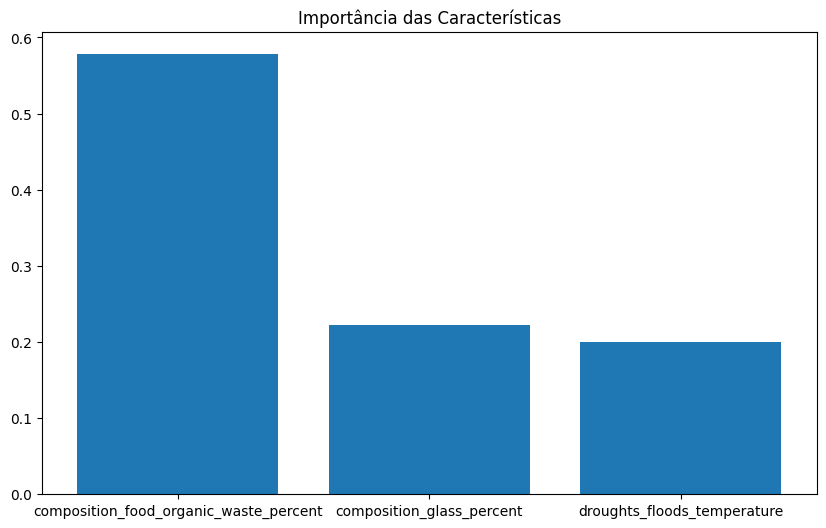

In [7]:

# Importância das características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = ['droughts_floods_temperature', 'composition_food_organic_waste_percent', 'composition_glass_percent']

# Visualização das importâncias das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.show()



### Comentários sobre as Importâncias
A temperatura de secas e inundações tem a maior importância entre as variáveis analisadas, indicando uma relação significativa com a reciclagem de resíduos. A composição de resíduos orgânicos e vidro também tem um impacto notável.
    


# 8. Conclusões
Com base nos resultados, podemos tirar as seguintes conclusões:
- A temperatura de secas e inundações tem a maior importância entre as variáveis analisadas, indicando uma relação significativa com a reciclagem de resíduos.
- A composição de resíduos orgânicos e vidro também tem um impacto notável na reciclagem de resíduos.
- O modelo RandomForestRegressor obteve um erro quadrático médio (MSE) de aproximadamente 0.028 e um MSE validado cruzado de aproximadamente 0.162. A métrica R^2 foi de aproximadamente 0.84, indicando um bom ajuste do modelo.

Esses resultados sugerem que é possível prever com precisão as condições ambientais marítimas e antecipar eventos prejudiciais à vida marinha usando técnicas de Machine Learning. Podemos desenvolver sistemas de alerta precoce e estratégias de mitigação com base nas previsões do modelo para reduzir os impactos negativos.
    